In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
df = pd.read_csv(r"datasets\train.csv")
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
df = df.dropna(axis=1, thresh=len(df)*.75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

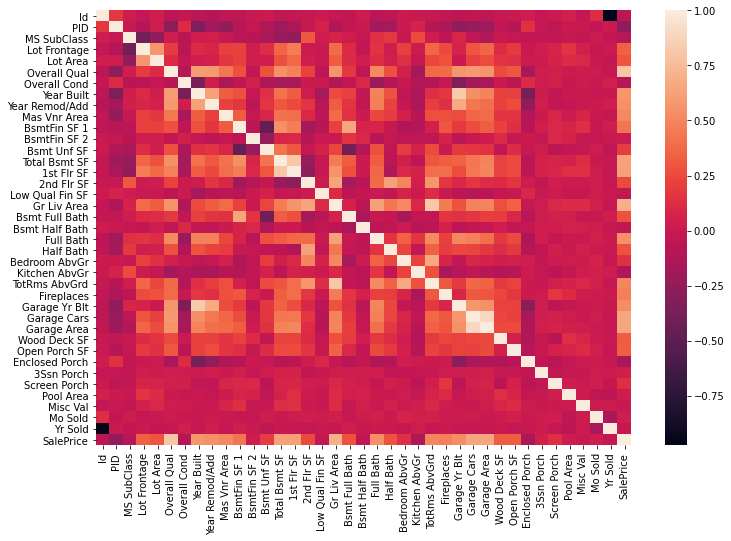

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [7]:
# Get dummies for categorical:

def add_dummies(col, df):
    dums = pd.get_dummies(df[col])
    dums = dums.iloc[:,1:]
    dums.columns = [f"{s}_{col.replace(' ','_')}" for s in dums.columns]
    return df.merge(dums, left_index=True, right_index=True)

# df = add_dummies("Central Air", df)
# df.columns

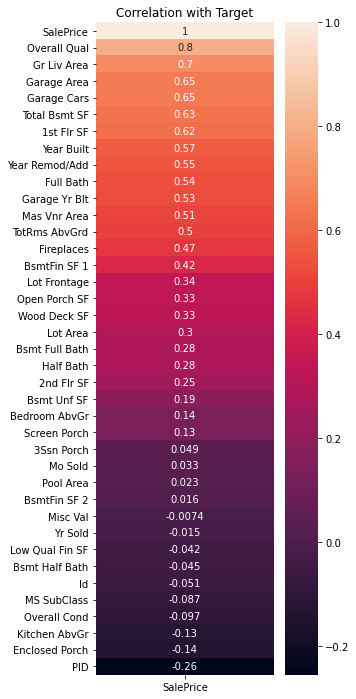

In [8]:
plt.figure(figsize=(4,12))
sns.heatmap(pd.DataFrame(df.corr()["SalePrice"]).sort_values("SalePrice", ascending=False), annot=True)
plt.title("Correlation with Target");

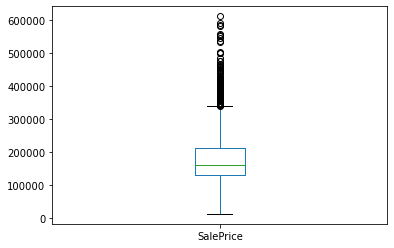

In [9]:
# Look at outliers before imputing
df["SalePrice"].plot.box()

In [10]:
# Create a list of columns to drop, and drop them.
# Utilities: no variance in column
# Land Slope: contour provides better prediction

drops = ["Id", "PID", "Utilities", "Land Slope", "Neighborhood", "Bldg Type", "House Style", "Exterior 1st", "Exterior 2nd", "Sale Type"]

df = df.drop(drops, axis = 1)

# Drop records with data errors
drop_records = [960] # Drop house 960 because it has 5x sqft, 2x room, etc. but price is $160,000. Appears to be data entry error...

df = df.drop(drop_records, axis=0) 
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,Condition 1,Condition 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,CulDSac,RRAe,Norm,...,0,44,0,0,0,0,0,3,2010,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,CulDSac,Norm,Norm,...,0,74,0,0,0,0,0,4,2009,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,Inside,Norm,Norm,...,0,52,0,0,0,0,0,1,2010,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,Inside,Norm,Norm,...,100,0,0,0,0,0,0,4,2010,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,Inside,Norm,Norm,...,0,59,0,0,0,0,0,3,2010,138500


In [11]:
# Look at the grouped mean and std of sale price within a feature
df.groupby(["Bsmt Exposure"]).SalePrice.agg(["mean","std"])

,mean,std
Bsmt Exposure,,
Av,206262.451389,82130.408408
Gd,272163.094059,109588.730924
Mn,189377.570552,73187.465263
No,164533.532487,61183.819878


In [12]:
# Look at frequencies within categorical features
df["Bsmt Exposure"].value_counts()

No    1339
Av     288
Gd     202
Mn     163
Name: Bsmt Exposure, dtype: int64

In [13]:
# Great dummy variables for categorical features by selecting significant responses within the feature
def make_features(df):
    features = df.copy()

    features["Street"] = (features["Street"] == "Pave").astype(int)
    features["Lot Shape"] = features["Lot Shape"].apply(lambda x: ["Reg", "IR1", "IR2", "IR3"].index(x))
    features["Land Contour"] = (features["Land Contour"]=="HLS").astype(int)
    features["Lot Config"] = (features["Lot Config"] == "CulDSac").astype(int)
    features["Condition 1"] = (features["Condition 1"].isin(["PosA", "PosN"])).astype(int)
    features["Condition 2"] = (features["Condition 2"].isin(["PosA", "PosN"])).astype(int)
    features["Year Built"] = 2020 - features["Year Built"]
    features["Year Remod/Add"] = 2020 - features["Year Remod/Add"]
    features["Roof Style"] = features["Roof Style"].isin(["Shed", "Flat", "Hip"]).astype(int)
    features["Roof Matl"] = features["Roof Matl"].isin(["WdShngl", "WdShake"]).astype(int)

    features["Mas Vnr Type"] = features["Mas Vnr Type"].isin(["Stone", "BrkFace"]).astype(int)
    features = pd.get_dummies(features, columns= ["Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating", "Heating QC", "Central Air", "Electrical", "Kitchen Qual", "Functional", "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", ], drop_first=True)
    features["Foundation"] = features["Foundation"].isin(["PConc"]).astype(int)

    features = features.drop(["Garage Cond_Po", "Garage Qual_Po"], axis=1)

    return features
    
features.head().iloc[:,42:]

NameError: name 'features' is not defined

In [14]:
# Available models: 
# Linear-Regression / polynomial regression
# DecisionTreeRegressor
# KNN Regressor
# Support Vector Regression
#

In [15]:
# Recursive Feature Elimination on Linear Regression... 
# Followed by cross-validated grid search for optimal parameters...

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [16]:
features = make_features(df)
df2 = features.loc[:,features.dtypes != object]

In [17]:
# Read in testing data to select features
df_test = pd.read_csv(r"datasets\test.csv")

test_features = make_features(df_test)

# Drop features in testing data not present in training data
drop_features = test_features.columns.difference(df2.columns)
test_features = test_features.drop(drop_features, axis=1)
for col in test_features.columns:
    test_features.loc[test_features[col].isnull(), col] = test_features[col].median()

# Drop features in training data not present in testing data
drop_features = df2.columns.difference(test_features.columns)
y = df2.SalePrice
df2 = df2.drop(drop_features, axis=1)
df2["SalePrice"] = y



In [18]:
df2

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,Condition 1,Condition 2,Overall Qual,...,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Gd,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,SalePrice
0,60,NaN,13517,1,1,0,1,0,0,6,...,1,0,0,1,0,0,1,0,1,130500
1,60,43.0,11492,1,1,0,1,0,0,7,...,1,0,0,1,0,0,1,0,1,220000
2,20,68.0,7922,1,0,0,0,0,0,5,...,0,1,0,1,0,0,1,0,1,109000
3,60,73.0,9802,1,0,0,0,0,0,5,...,0,0,0,1,0,0,1,0,1,174000
4,50,82.0,14235,1,1,0,0,0,0,6,...,0,1,0,1,0,0,1,0,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0,11449,1,1,1,0,0,0,8,...,0,0,0,1,0,0,1,0,1,298751
2047,30,NaN,12342,1,1,0,0,0,0,4,...,0,1,0,1,0,0,1,0,1,82500
2048,50,57.0,7558,1,0,0,0,0,0,6,...,0,1,0,0,1,0,0,0,1,177000
2049,20,80.0,10400,1,0,0,0,0,0,4,...,0,1,0,1,0,0,1,0,1,144000


In [19]:
y = df.SalePrice
X = df2
X = X.drop("SalePrice", axis=1)
for col in X.columns:
    X.loc[X[col].isnull(), col] = X[col].median()

# Scaling produces the same r2 for linear regression
# X = StandardScaler().fit_transform(X)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [21]:
reg = LinearRegression().fit(x_train,y_train)
reg.score(x_test,y_test)

0.9093279187425317

In [22]:
sorted_by_coef = reg.coef_.argsort()

df2.iloc[:5, sorted_by_coef[::-1]]

,Gr Liv Area,Functional_Typ,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Maj2,Roof Matl,Garage Qual_Gd,Street,Land Contour,...,Kitchen Qual_Fa,Exter Qual_Fa,Kitchen Qual_Gd,Exter Qual_Gd,Kitchen Qual_TA,Exter Qual_TA,Exter Cond_Po,2nd Flr SF,1st Flr SF,Low Qual Fin SF
0,1479,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,754,725,0
1,2122,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1209,913,0
2,1057,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1057,0
3,1444,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,700,744,0
4,1445,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,614,831,0


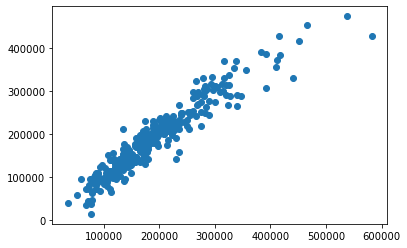

In [23]:
# Plot predictions
plt.scatter(y_test, reg.predict(x_test))

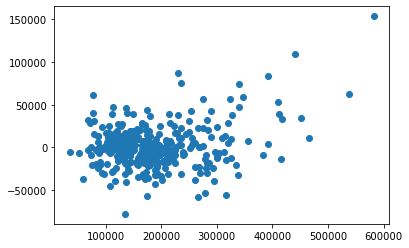

In [24]:
# Plot residuals
plt.scatter(y_test, y_test-reg.predict(x_test))

In [25]:
# Model 2: KNN

y = df.SalePrice
X = df2
X = X.drop("SalePrice", axis=1)
for col in X.columns:
    X.loc[X[col].isnull(), col] = X[col].median()


x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [26]:
for k in range(2,40):
    reg = KNN(k)
    reg.fit(x_train, y_train)
    print(k, reg.score(x_test, y_test))

2 0.6636449341602105
3 0.7234424218831873
4 0.730797479334327
5 0.726718551090978
6 0.7283374121646966
7 0.7289658791751781
8 0.7260182478488444
9 0.7188857318757509
10 0.7158168658689903
11 0.7054328616371477
12 0.7029120151984798
13 0.6972396725801104
14 0.6971287937633311
15 0.6964455207245484
16 0.6895727330047332
17 0.6869213256213513
18 0.6811379278400334
19 0.6789541229045493
20 0.6767593653246677
21 0.6713519107127708
22 0.6700069565683511
23 0.6677896935987186
24 0.6634941348360487
25 0.6599692681716607
26 0.6597766362749228
27 0.6572293341577354
28 0.6552100666045124
29 0.6540509107856811
30 0.6514943555215269
31 0.6518376212443967
32 0.6488154725017702
33 0.645184965811946
34 0.6419314458143532
35 0.6375643358081838
36 0.6358194764278973
37 0.6342551847300737
38 0.6292640080734563
39 0.6268238169264


In [27]:
# Ridge and Lasso Models
from sklearn.linear_model import Ridge, Lasso

x = df2.drop(["SalePrice", "Misc Val"], axis=1).iloc[:, 2:]
for col in x.columns:
    x.loc[x[col].isnull(), col] = np.median(x[col].values)
    
y = df2.SalePrice


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
xtr_scaled = scaler.fit_transform(x_train)
xts_scaled = scaler.transform(x_test)

lasso = LassoCV(alphas=[0.1,0.2,0.5,0.8,1,2,5,9,18])
lasso.fit(xtr_scaled, y_train)
lasso.score(xts_scaled, y_test)



0.9095937719766831

In [29]:
# Grid Search CV to find best parameters for lasso
from sklearn.model_selection import GridSearchCV

params = {
    "alpha": [.0001,1.4, 1.5, 1.6, 2.5, 10],
    "fit_intercept" : [True]
}

estimator = Lasso()

model = GridSearchCV(estimator, params)
model.fit(xtr_scaled, y_train)
model.score(xts_scaled, y_test)

0.9095173622869706

In [30]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import RidgeCV

scaler = RobustScaler()
xtr_scaled = scaler.fit_transform(x_train)
xts_scaled = scaler.transform(x_test)

ridge = RidgeCV(alphas=[0.1,0.2,0.5,0.8,1,2,5,9,18])
ridge.fit(xtr_scaled, y_train)
ridge.score(xts_scaled, y_test)



0.9105100871275331

In [31]:
# Grid Search CV to find best parameters for lasso
from sklearn.model_selection import GridSearchCV

params = {
    "alpha": [.01, .05, 1, 1.5, 2, 5],
    "fit_intercept" : [True]
}

estimator = Ridge()

model = GridSearchCV(estimator, params)
model.fit(xtr_scaled, y_train)
train_pred = model.predict(xts_scaled)
model.score(xts_scaled, y_test), model.best_params_

(0.9105100873401623, {'alpha': 5, 'fit_intercept': True})

In [32]:
test_features_scaled = scaler.transform(test_features)
predictions = model.predict(test_features_scaled)
df_test["SalePrice"] = predictions
results = df_test[["Id", "SalePrice"]]
results = results.sort_values("Id").set_index("Id")

results.to_csv("sub_reg.csv")

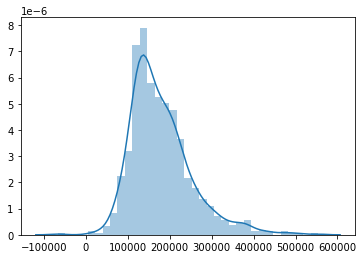

In [33]:
sns.distplot(results)

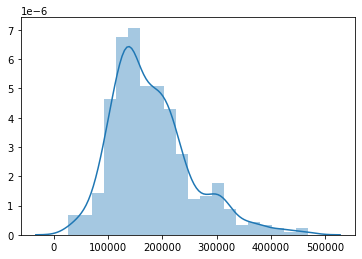

In [34]:
sns.distplot(train_pred)